In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (16, 9),
          'axes.grid': False,
          'grid.linestyle': '-',
          'grid.alpha': 0.2,
          'lines.markersize': 5.0,
          'xtick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.size': 10.0,
          'xtick.minor.size': 5.0,
          'xtick.top': True,
          'ytick.minor.visible': True,
          'ytick.direction': 'in',
          'ytick.major.size': 10.0,
          'ytick.minor.size': 5.0,
          'ytick.right': True,
          'errorbar.capsize': 0.0,
          'figure.max_open_warning': 50,
})

In [5]:
angle_scan = {}
angle_scan[264] = 180
angle_scan[265] = 160
angle_scan[266] = 140
angle_scan[267] = 130
angle_scan[268] = 120
angle_scan[269] = 110
angle_scan[270] = 100
angle_scan[271] = 90
angle_scan[272] = 80
angle_scan[273] = 70
angle_scan[274] = 60
angle_scan[275] = 50
angle_scan[276] = 40
angle_scan[277] = 20
angle_scan[278] = 0


In [76]:
npy = {}
for run_number in range(264, 279):
    npy[run_number] = {}
    for channel in [1, 2]:
        npy[run_number][channel] = np.load(f'/eos/home-g/ggaudino/tb_analysis/npy/Mean_Waveform_run{run_number}_channel{channel}.npy')

In [70]:
pq = {}
for run_number in range(264, 273):
    pq[run_number] = pd.read_parquet(f'/eos/home-g/ggaudino/tb_analysis/parqs/info_run{run_number}.parq')

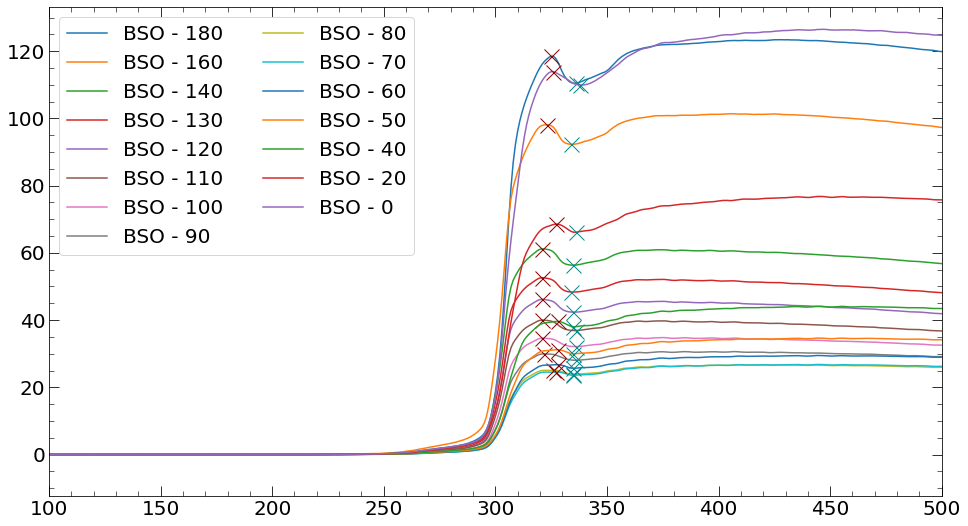

In [146]:
plt.figure(figsize = (16, 9))
maxs = {}
mins = {}
frac = {}
diffs = {}
for run_number in range(264,279):
    channel = 2
    diff = npy[run_number][channel]
    plt.plot(diff, label = f'BSO - {angle_scan[run_number]}')
    
    index = np.argmax(diff[300:340])
    index = index + 300
    
    index_min = np.argmin(diff[index:340])
    index_min = index_min + index
    
    maxs[angle_scan[run_number]] = diff[index]
    mins[angle_scan[run_number]] = diff[index_min]
    frac[angle_scan[run_number]] = maxs[angle_scan[run_number]]/mins[angle_scan[run_number]]
    diffs[angle_scan[run_number]] = maxs[angle_scan[run_number]] - mins[angle_scan[run_number]]
    plt.plot(index, maxs[angle_scan[run_number]], 'x', color='darkred', markersize = 15)
    plt.plot(index_min, mins[angle_scan[run_number]], 'x', color='darkcyan', markersize = 15)
    
    plt.legend(ncol = 2, fontsize = 20)
    plt.xlim(100,500)
    plt.xlabel('')

Text(0.5, 1.0, 'Cherenkov Yield (max/min in the Cerenkov range)')

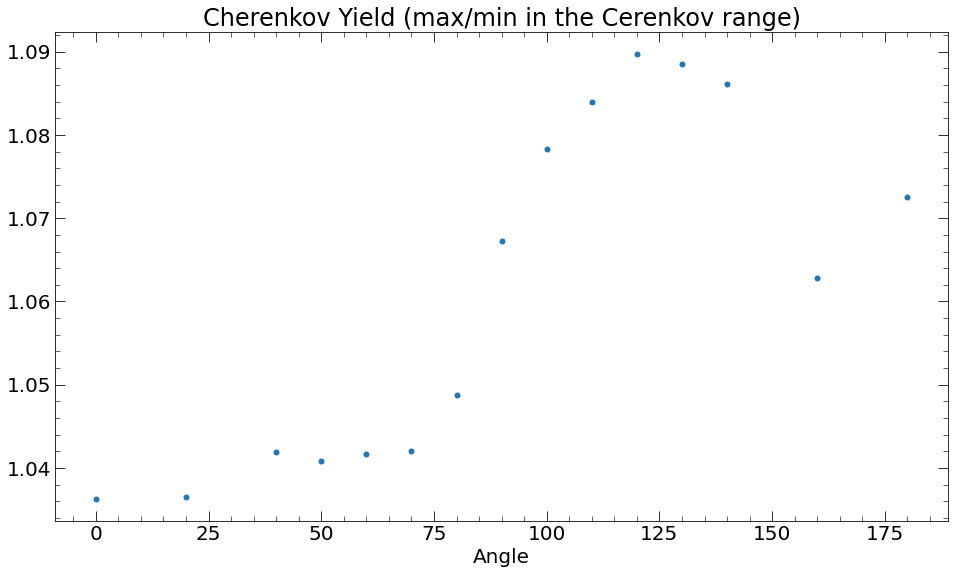

In [148]:
plt.plot(frac.keys(), frac.values(), 'o')
plt.xlabel('Angle')
plt.title('Cherenkov Yield (max/min in the Cerenkov range)')